# Extract Contour of mesh

Extraction of contour is generating polygon coordinates of the external boundaries of a mesh with or without boundary condition file

It returns a list of list of tuples
wich contains coordinates (with the first point repeated at the end) of external contour sorted clockwise and holes in the external contour sorted anticlockwise.

The script can generate a GIS file with fiona in several formats (shapefile, geopackage, geojson, etc.).

It can handle "islands" and separated domains

All the examples below can be done using the one line command **run_telfile.py contour**

In [1]:
!run_telfile.py contour -h



Interpreting command line options
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

usage: run_telfile.py contour [-h] [-b BND_FILE] Telemac File shp_file

positional arguments:
  Telemac File          Mesh file
  shp_file              Shape file

optional arguments:
  -h, --help            show this help message and exit
  -b BND_FILE, --bnd-file BND_FILE
                        Boundary file


## 1. example with islands (pildepon test-case)

In [2]:
import os
from pretel.extract_contour import extract_contour, write_gis_file

geo_file_path = os.path.join(os.environ['HOMETEL'], 
                                        'examples',
                                        'telemac2d',
                                        'pildepon',
                                        'geo_pildepon.slf')

shp_file = "geo_pildepon.shp"

domains_bnd = extract_contour(geo_file_path)

write_gis_file(domains_bnd, shp_file)


Number of nodes:  2280
0 %
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
Number of boundary nodes:  258
Domain 1
Islands


In [3]:
for file in os.listdir():
    if file == shp_file: print(file)

geo_pildepon.shp


Geopandas can be used to plot the GIS file

<AxesSubplot:>

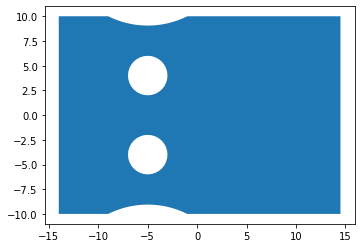

In [4]:
import geopandas as gp

boundaries = gp.read_file(shp_file)
boundaries.plot()


## 2. example with separated domains (weirs test-case)

Number of nodes:  519
0 %
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
100 %
Number of boundary nodes:  160
Domain 1
No Islands
Domain 2
No Islands
Domain 3
No Islands
Domain 4
No islands


<AxesSubplot:>

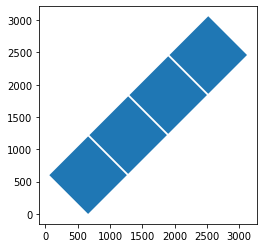

In [5]:
geo_file_path = os.path.join(os.environ['HOMETEL'], 
                                        'examples',
                                        'telemac2d',
                                        'weirs',
                                        'geo_weirs.slf')

shp_file = "geo_weirs.shp"

domains_bnd = extract_contour(geo_file_path)

write_gis_file(domains_bnd, shp_file)

boundaries = gp.read_file(shp_file)
boundaries.plot()

## 3. example to illustrate speed-up with boundary condition file

Extract_contour method can use a boundary condition file to speed-up the treatmentboundary

first, malpasset geometry without boundary condition file given

Number of nodes:  53081
0 %


10 %


20 %


30 %


40 %


50 %


60 %


70 %


80 %


90 %


100 %
Number of boundary nodes:  2160
Domain 1
No islands


<AxesSubplot:>

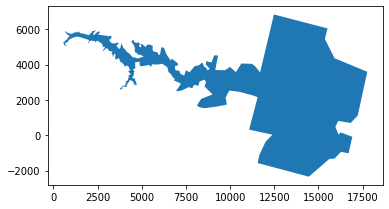

In [6]:
geo_file_path = os.path.join(os.environ['HOMETEL'], 
                                        'examples',
                                        'telemac2d',
                                        'malpasset',
                                        'geo_malpasset-large.slf')

shp_file = "geo_malpasset-large.shp"

domains_bnd = extract_contour(geo_file_path)

write_gis_file(domains_bnd, shp_file)

boundaries = gp.read_file(shp_file)
boundaries.plot()

Now, the same extraction with the boundary file given

Number of nodes:  53081
0 %
10 %


20 %
30 %
40 %


50 %
60 %


70 %
80 %
90 %


Number of boundary nodes:  2160
Domain 1
No islands


<AxesSubplot:>

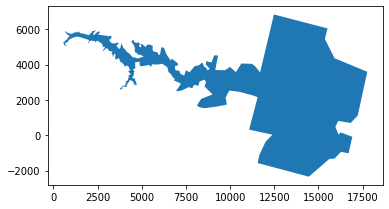

In [7]:
bnd_file = os.path.join(os.environ['HOMETEL'], 
                                        'examples',
                                        'telemac2d',
                                        'malpasset',
                                        'geo_malpasset-large.cli')

domains_bnd = extract_contour(geo_file_path, \
                              bnd_file=bnd_file)

write_gis_file(domains_bnd, shp_file)

boundaries = gp.read_file(shp_file)
boundaries.plot()